# Submission 1 : Menyelesaikan Permasalahan Human Resources

- Nama: Labib Ammar Fadhali
- Email: labibfadhali12@gmail.com
- Id Dicoding: labibaf

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
import joblib

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df=pd.read_csv('./dataset/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [6]:
df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## Data Preparation / Preprocessing

Handling Missing Value

In [7]:
df['Attrition'].value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

In [8]:
df['Attrition']=df['Attrition'].fillna(df['Attrition'].mode()[0])

In [9]:
df['Attrition'].isna().sum()

0

Duplicate Check

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

EmployeeId                  1470
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Feature Engineering

In [12]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,0.0,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,0.0,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [13]:
attrition_map={1:'Yes',0:'No'}
df['Attrition']=df['Attrition'].map(attrition_map)

education_map={1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'}
df['Education']=df['Education'].map(education_map)

performance_map={1:'Low',2:'Good',3:'Excelllent',4:'Outstanding'}
df['PerformanceRating']=df['PerformanceRating'].map(performance_map)
df['WorkLifeBalance']=df['WorkLifeBalance'].map(performance_map)

sactification_map={1:'Low',2:'Medium',3:'High',4:'Very High'}
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].map(sactification_map)
df['JobSatisfaction']=df['JobSatisfaction'].map(sactification_map)
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].map(sactification_map)
df['JobInvolvement']=df['JobInvolvement'].map(sactification_map)

In [14]:
df['AgeAtStartEmployment'] = df['Age'] - df['TotalWorkingYears']

In [15]:
drop_cols=['EmployeeCount','StandardHours','Over18']
df=df.drop(columns=drop_cols,axis=1)

In [16]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeAtStartEmployment
0,1,38,No,Travel_Frequently,1444,Human Resources,1,Master,Other,Very High,Male,88,High,1,Human Resources,Medium,Married,2991,5224,0,Yes,11,Excelllent,Medium,1,7,2,Excelllent,6,2,1,2,31
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,Female,61,Low,2,Healthcare Representative,Medium,Married,4777,14382,5,No,15,Excelllent,Low,0,15,2,Low,1,0,0,0,22
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,34,High,1,Research Scientist,High,Married,2461,10332,9,Yes,12,Excelllent,High,3,18,2,Outstanding,10,0,2,7,33
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,Female,77,High,4,Sales Executive,Medium,Married,13525,14864,5,No,14,Excelllent,Very High,1,23,2,Outstanding,20,4,4,8,19
4,5,40,No,Travel_Rarely,1194,Research & Development,2,Master,Medical,High,Female,98,High,1,Research Scientist,High,Married,2001,12549,2,No,14,Excelllent,Medium,3,20,2,Excelllent,5,3,0,2,20


In [17]:
df.to_csv('./dataset/employee_data_cleaned.csv',index=False)

## EDA

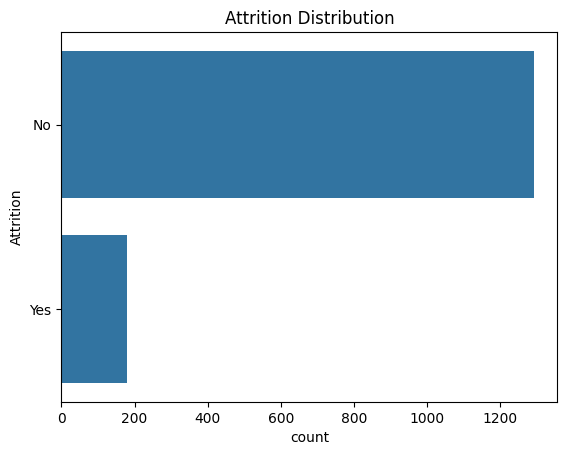

In [18]:
sns.countplot(df['Attrition'])
plt.title('Attrition Distribution')
plt.show()

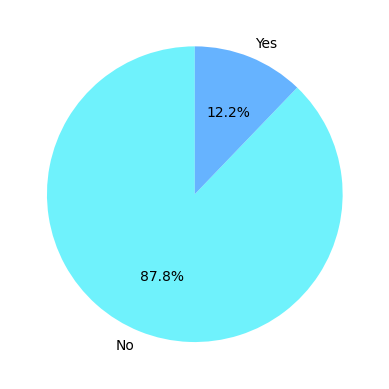

In [19]:
plt.pie(df['Attrition'].value_counts(),labels=df['Attrition'].value_counts().index,autopct='%1.1f%%',startangle=90,colors=['#6ff2fc','#66b3ff'])
plt.show()

In [20]:
def categorical_plot(features,df,segment_feature=None):
  """
   Parameter:
    - df : DataFrame
        DataFrame yang berisi data.
    - features : list of strings
        Daftar nama kolom yang akan diplot.
    - segment_feature : string, opsional
        Nama kolom untuk segmentasi data (misalnya untuk plot yang dihasilkan menggunakan hue).
  """
  num_plot=len(features)
  fig,ax=plt.subplots(num_plot,figsize=(8,5*num_plot))
  for i, feature in enumerate(features):
    if segment_feature:
      sns.countplot(data=df,x=segment_feature,hue=feature,ax=ax[i])
    else:
      sns.countplot(data=df,x=feature,ax=ax[i])
  plt.tight_layout()
  plt.show()

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Attrition')

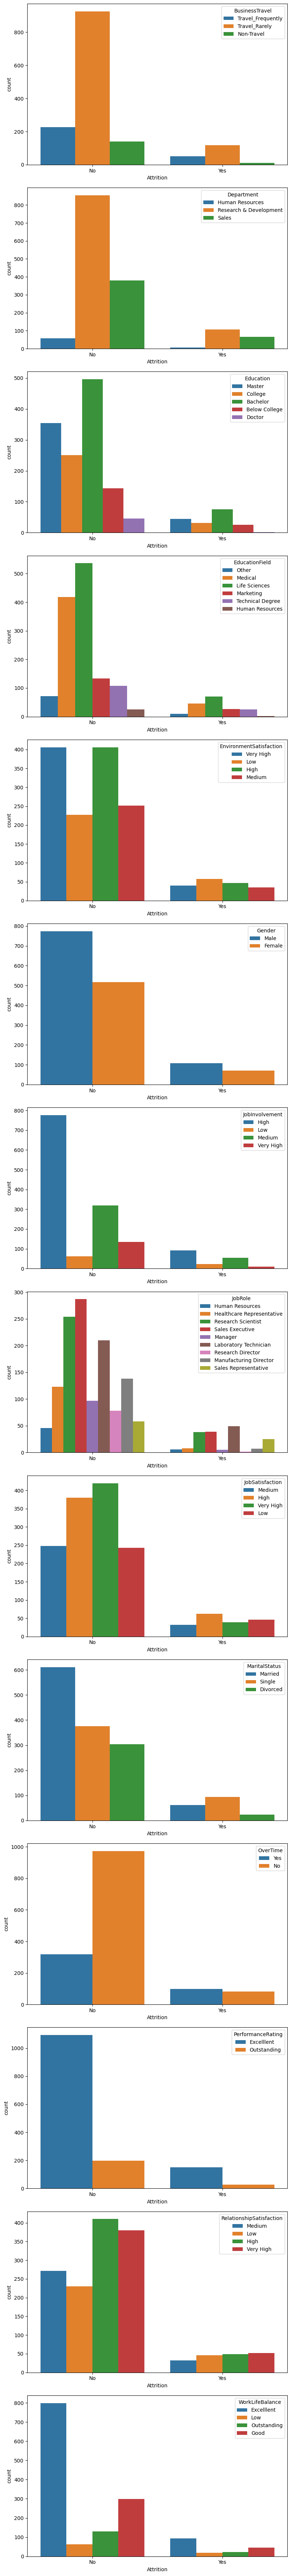

In [22]:
categorical_plot(
   features=categorical_columns,
   df=df,
   segment_feature='Attrition'
)

In [23]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num['Attrition'] = df['Attrition']
df_num['Attrition'] = df_num['Attrition'].map({'Yes': 1, 'No': 0})

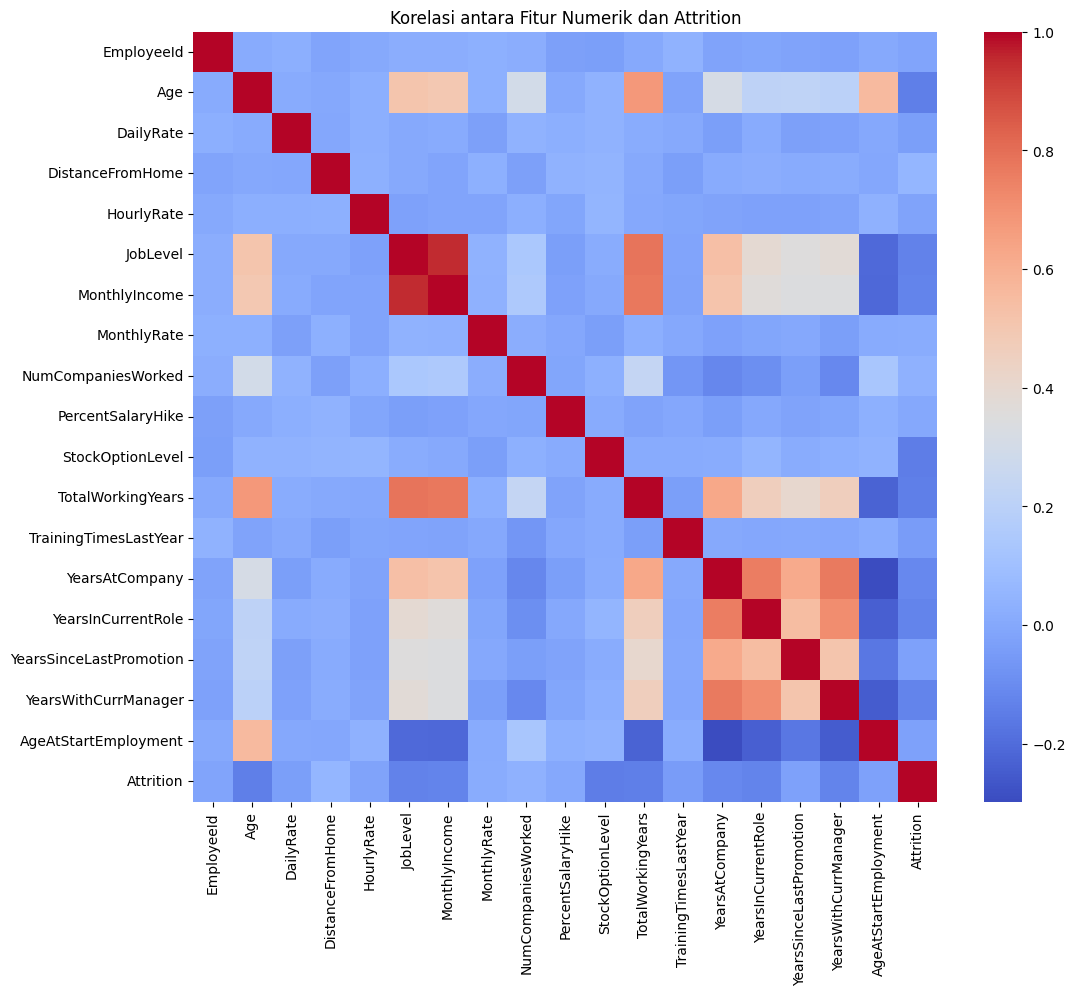

In [24]:
correlation = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Korelasi antara Fitur Numerik dan Attrition')
plt.show()

## Modeling

In [25]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [26]:
X = df.drop(columns=['EmployeeId', 'Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42)
}

Akurasi model Logistic Regression: 0.891156462585034
Classification Report model Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       262
           1       0.00      0.00      0.00        32

    accuracy                           0.89       294
   macro avg       0.45      0.50      0.47       294
weighted avg       0.79      0.89      0.84       294



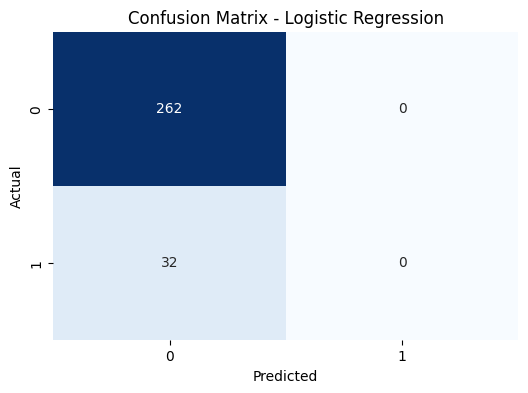

Akurasi model Decision Tree: 0.7687074829931972
Classification Report model Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       262
           1       0.15      0.25      0.19        32

    accuracy                           0.77       294
   macro avg       0.53      0.54      0.53       294
weighted avg       0.82      0.77      0.79       294



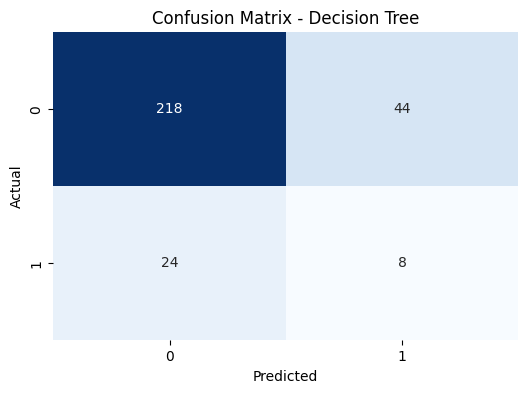

Akurasi model Random Forest: 0.8877551020408163
Classification Report model Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       262
           1       0.44      0.12      0.20        32

    accuracy                           0.89       294
   macro avg       0.67      0.55      0.57       294
weighted avg       0.85      0.89      0.86       294



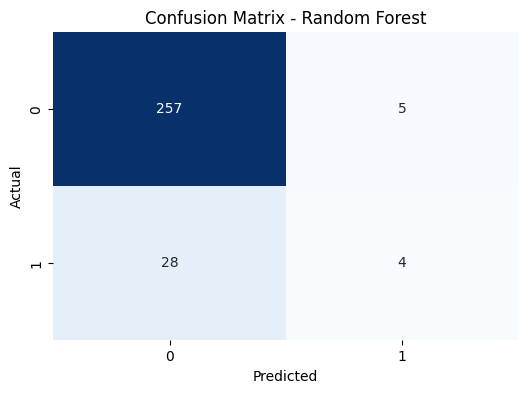

Akurasi model Gradient Boosting: 0.8809523809523809
Classification Report model Gradient Boosting:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       262
           1       0.40      0.19      0.26        32

    accuracy                           0.88       294
   macro avg       0.65      0.58      0.60       294
weighted avg       0.85      0.88      0.86       294



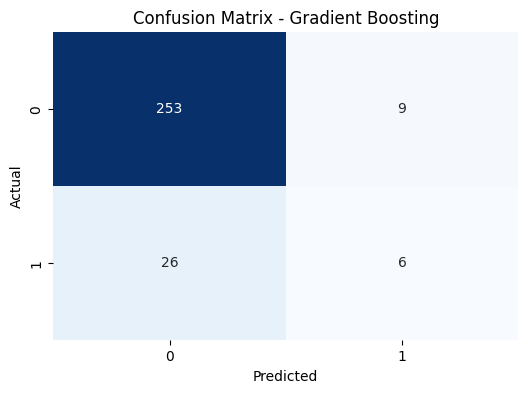

Akurasi model Neural Network: 0.8775510204081632
Classification Report model Neural Network:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       262
           1       0.17      0.03      0.05        32

    accuracy                           0.88       294
   macro avg       0.53      0.51      0.49       294
weighted avg       0.81      0.88      0.84       294



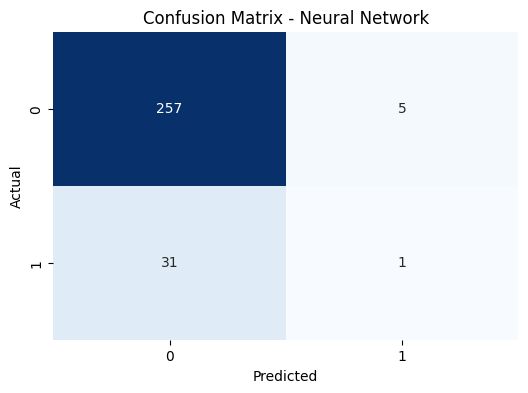

In [28]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi model {name}: {accuracy}")

    # Classification Report
    print(f"Classification Report model {name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Evaluation

In [29]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42)
}

Akurasi model Logistic Regression: 0.6808510638297872
Classification Report model Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       265
           1       0.65      0.77      0.70       252

    accuracy                           0.68       517
   macro avg       0.69      0.68      0.68       517
weighted avg       0.69      0.68      0.68       517



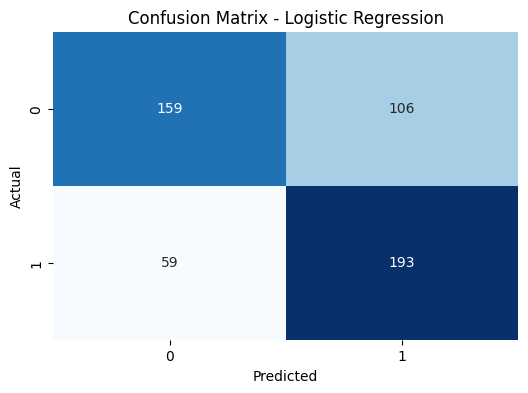

Akurasi model Decision Tree: 0.9400386847195358
Classification Report model Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       265
           1       0.89      1.00      0.94       252

    accuracy                           0.94       517
   macro avg       0.95      0.94      0.94       517
weighted avg       0.95      0.94      0.94       517



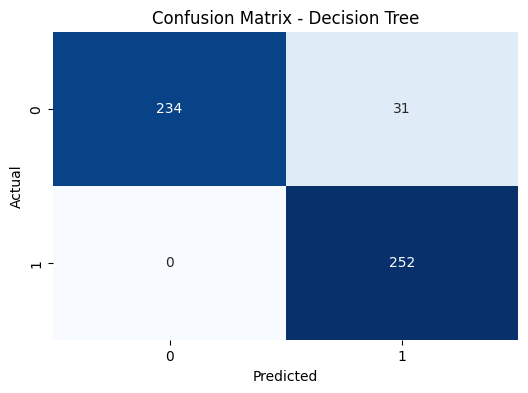

Akurasi model Random Forest: 0.9864603481624759
Classification Report model Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       265
           1       0.97      1.00      0.99       252

    accuracy                           0.99       517
   macro avg       0.99      0.99      0.99       517
weighted avg       0.99      0.99      0.99       517



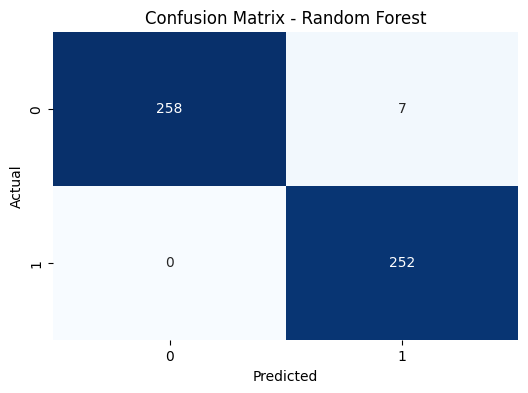

Akurasi model Gradient Boosting: 0.9245647969052224
Classification Report model Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       265
           1       0.89      0.96      0.93       252

    accuracy                           0.92       517
   macro avg       0.93      0.93      0.92       517
weighted avg       0.93      0.92      0.92       517



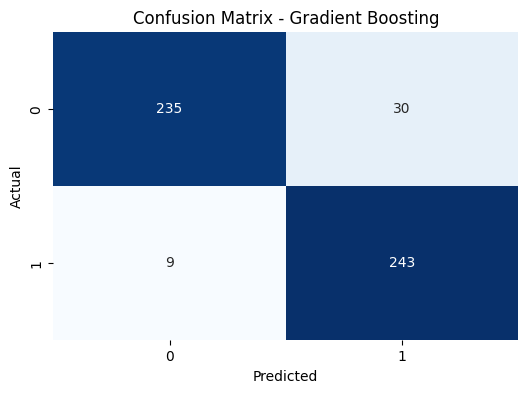

Akurasi model Neural Network: 0.5918762088974855
Classification Report model Neural Network:
              precision    recall  f1-score   support

           0       0.80      0.27      0.41       265
           1       0.55      0.93      0.69       252

    accuracy                           0.59       517
   macro avg       0.67      0.60      0.55       517
weighted avg       0.68      0.59      0.54       517



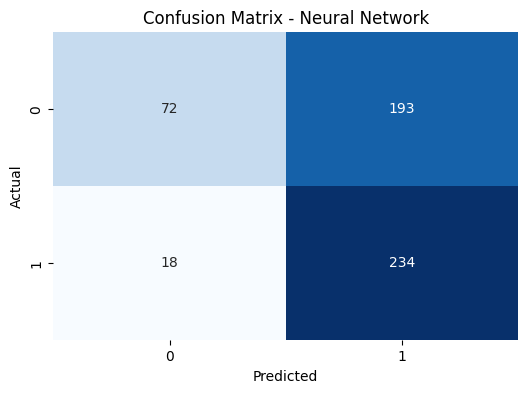

Model terbaik: RandomForestClassifier(random_state=42)


In [32]:
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi model {name}: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        
    # Classification Report
    print(f"Classification Report model {name}:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print(f"Model terbaik: {best_model}")

In [33]:
joblib.dump(best_model, './model/best_model.pkl')
print("Model terbaik telah disimpan sebagai 'best_model.pkl'.")

Model terbaik telah disimpan sebagai 'best_model.pkl'.
